because calculating random data takes long, here is a projection

In [24]:
library(tidyverse)
files<-list.files("~/data/trd/local_phylogenies_random_data","local_phylogenies",full.names = TRUE)
files_mtime<-file.mtime(files)

files_df<-tibble(file=files, mtime=as.numeric(files_mtime))
files_df<-arrange(files_df, mtime)
files_df<-mutate(files_df, count=row_number())
head(files_df)

file,mtime,count
<chr>,<dbl>,<int>
/home/jnrunge/data/trd/local_phylogenies_random_data/local_phylogenies.1.RDS,1688045750,1
/home/jnrunge/data/trd/local_phylogenies_random_data/local_phylogenies.2.RDS,1688045763,2
/home/jnrunge/data/trd/local_phylogenies_random_data/local_phylogenies.4.RDS,1688045787,3
/home/jnrunge/data/trd/local_phylogenies_random_data/local_phylogenies.3.RDS,1688045790,4
/home/jnrunge/data/trd/local_phylogenies_random_data/local_phylogenies.5.RDS,1688045805,5
/home/jnrunge/data/trd/local_phylogenies_random_data/local_phylogenies.7.RDS,1688045816,6


In [63]:
# projection based on latest data
progress_at_the_moment<-as.numeric(lm(mtime~count,files_df%>%slice_tail(n=100))$coefficients["count"])
projection<-tibble(
    mtime=max(pull(files_df,mtime))+((seq(from=max(pull(files_df,count)),to=40000)-max(pull(files_df,count)))*progress_at_the_moment),
    count=seq(from=max(pull(files_df,count)),to=40000))
head(projection)
tail(projection)

mtime,count
<dbl>,<int>
1689777440,10910
1689777512,10911
1689777585,10912
1689777657,10913
1689777730,10914
1689777802,10915


mtime,count
<dbl>,<int>
1691886680,39995
1691886753,39996
1691886825,39997
1691886898,39998
1691886970,39999
1691887043,40000


In [65]:
files_df<-mutate(files_df, mtime=as.POSIXct(mtime, origin="1970-01-01"))
projection<-mutate(projection, mtime=as.POSIXct(mtime, origin="1970-01-01"))

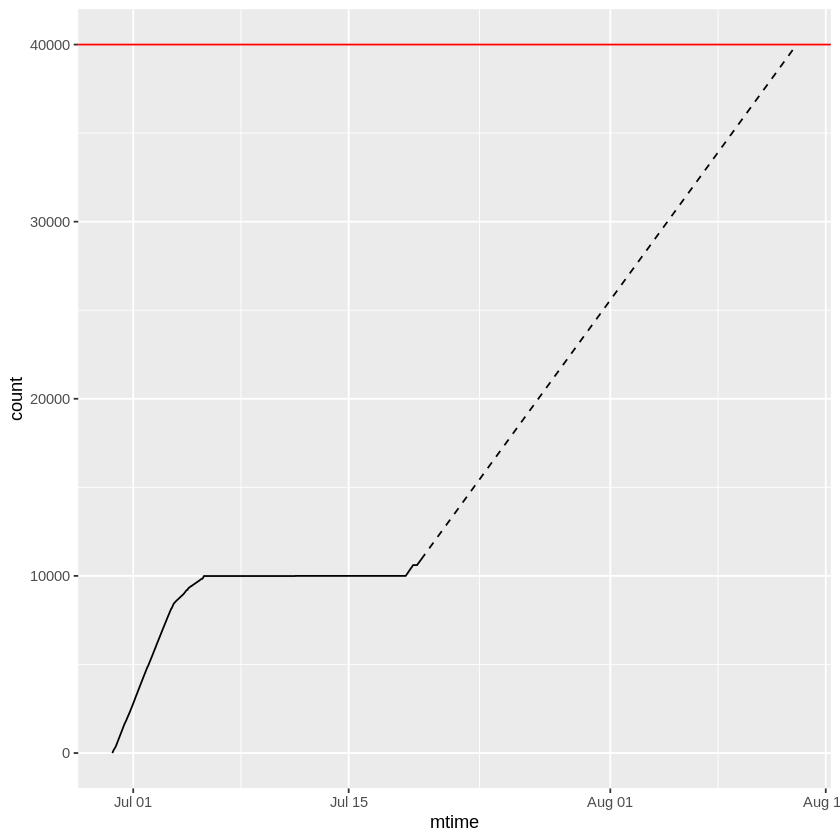

In [66]:
library(ggplot2)
ggplot(files_df, aes(mtime, count))+
geom_line()+geom_hline(yintercept=40000,color="red")+
geom_line(data=projection, linetype="dashed")